### How to remove Stationarity - The data must have;
### 1. Constant mean
### 2. Constant variance
### 3. Autocovariance that does not depend on time

## we can only apply TS to stationary data
## We can use either ROLLING STATISTICS OR
## ADCF - Null hypothesis to show that TS is non- stationary

### formerly known as AR + MA Model
### We now have AR I MA Model, integrating the 'Integration' (d = order of differentiation)
### p = autoregressive lags and q = moving average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [6]:
data = pd.read_csv("C:\Python_Files\AirPassengers.csv")
#Parse strings to datetime type
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
indexDataset = data.set_index(['Month'])

In [8]:
from datetime import datetime
indexDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


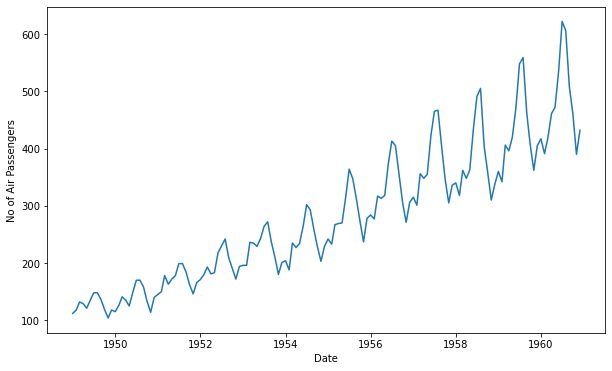

In [10]:
## Plot Graph

plt.xlabel('Date')
plt.ylabel('No of Air Passengers')
plt.plot(indexDataset)

In [12]:
#Determining Rolling Statistics
rolmean = indexDataset.rolling(window=12).mean()

rolstd = indexDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


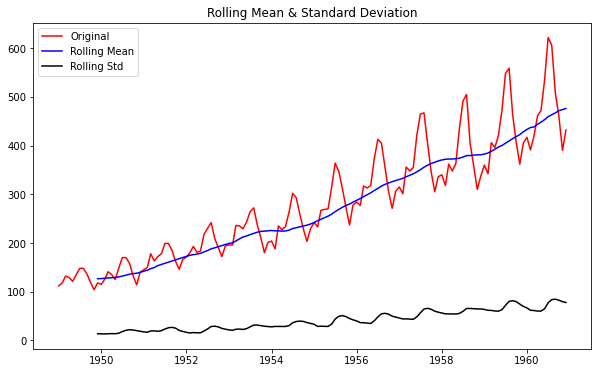

In [13]:
#plot rolling statistics
orig = plt.plot(indexDataset, color='red', label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
#Perform Dickey-Fuller test;
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test')
dftest = adfuller(indexDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statitics', 'p-value', '#lags used',
                                        'Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test
Test Statitics                  0.815369
p-value                         0.991880
#lags used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


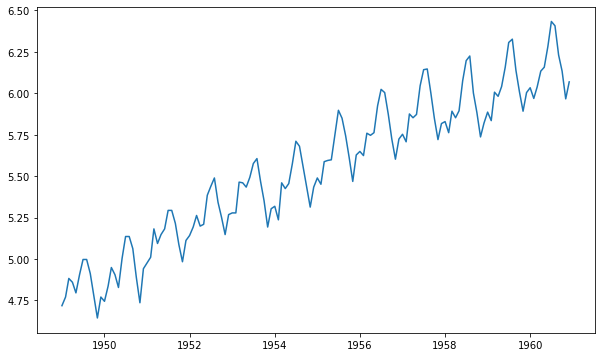

In [18]:
#Estimating trend
indexDataset_logScale = np.log(indexDataset)
plt.plot(indexDataset_logScale)

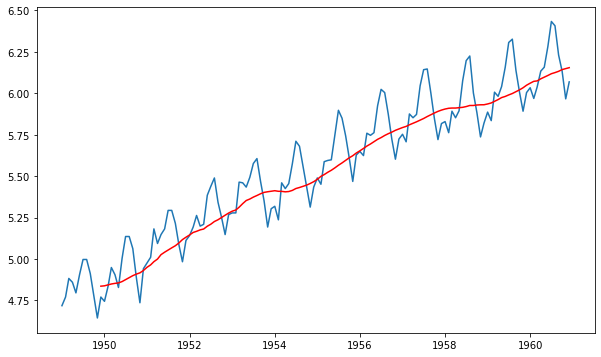

In [19]:
#Plot of constant mean
movingAverage = indexDataset_logScale.rolling(window=12).mean()
movingSTD = indexDataset_logScale.rolling(window=12).std()
plt.plot(indexDataset_logScale)
plt.plot(movingAverage, color='red')

In [21]:
datasetlogscaleminusMA = indexDataset_logScale - movingAverage
datasetlogscaleminusMA.head(12)

#Remove NA values
datasetlogscaleminusMA.dropna(inplace=True)
datasetlogscaleminusMA.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635
